# Minicurso Python — Dia 02 

## Por que utilizar programação nos métodos quantitativos?

- Automatiza cálculos complexos e repetitivos
- Evita erros manuais
- Possibilita lidar com grandes bases de dados
- Certos modelos estatísticos só são possíveis na computação
- Facilita a transparência e reprodutibilidade

## O que é uma linguagem de programação?

- Conjunto de regras e instruções
- Funciona por algorítimos
- Ponte entre o raciocínio humano e a execução da máquina

## Por que python?

- Simples e intuitiva
- Codigo aberto
- Comunidade extensa
- Ecossistema voltado para dados

## Por que não R?

- Python é mais direto
- Ambiente de execução poluido
- **IMPORTANTE:** R é uma ótima linguagem de programação para métodos quantitativos, inclusive mais utilizada no mercado acadêmico, minha cedisão de usar python é por acreditar que é uma lingauem mais introdutória e que facilita aprender R eventualmente caso queiram

## Breve história sobre Python

- Criado em 1991 por Guido van Rossum
- Se popularizou a partir dos anos 2000
- Focado em legibilidade e estética no código
- Funciona através de pacotes

---

## Algumas noções introdutórias

In [6]:
print("Olá Mundo!")

Olá Mundo!


In [ ]:
1 + 1

2

In [7]:
soma = 1 + 1

print(soma)

2


In [12]:
def somar(a, b):
    return a + b

somar(1,2)

3

In [8]:
#Dicionário

lista = [1,2,3,4,5]

lista

[1, 2, 3, 4, 5]

In [5]:
pessoa = {
    "nome": "Gabriel",
    "idade": 24,
    "cidade": "Fortaleza"
}

print(pessoa)

{'nome': 'Gabriel', 'idade': 24, 'cidade': 'Fortaleza'}


In [16]:
#Operadores condicionais

media = (0 + 4 + 10)/3

if media >= 7:
    print('Aprovado')
elif media > 5:
    print("AF")
else:
    print('Reprovado')

Reprovado


In [17]:
def media(a, b, c):
    total = a + b + c
    nota = total / 3
    
    if nota >= 7:
        print('Aprovado')
    elif nota > 5:
        print("AF")
    else:
        print('Reprovado')

    return nota

media(7, 6, 8)

Aprovado


7.0

---

## Analisando dados de violência a partir de indicadores socioeconômicos

### Importando pandas e a base de dados

Aqui vamos importar o primpeiro e mais importante pacote para analise de dados em Python: Pandas
É uma biblioteca simples e completa, vai auxiliar na manipulação tratamento e limpeza dos dados

In [ ]:
pip install pandas

In [1]:
import pandas as pd

A base de dados é referente a crimes em cada estado dos EUA com dados socioeconômicos

Foi retirada de: https://www.kaggle.com/datasets/wenhsuanliang/crime-economic-factors-datasets?resource=download

In [18]:
df = pd.read_csv('crime_data.csv')

df.head() #O parâmetro é assumido como 5, mas podemos dar qualquer outro valor inteiro positivo

,State,Homicide_Rate,Gini_Index,Unemployment_Rate (%),Per_Capita_Income (USD),Population (P),Pop_Density (p/mi^2),Edu_Spending (USD),Poverty_Rate(%),Urban_Population (%)
0,Alabama,7.8,0.49,3.0,42334,4898246,96.72,2934153320,0.18,0.59
1,Alaska,6.4,0.43,6.2,59687,735720,1.29,432231773,0.10,0.66
2,Arizona,5.1,0.46,4.9,43650,7275070,64.04,5277896190,0.17,0.90
3,Arkansas,7.2,0.48,3.5,42566,3026412,58.16,1422088220,0.18,0.56
4,California,4.4,0.49,4.0,62586,39747267,255.15,17923849045,0.15,0.95


###  Verificando missings e duplicatas

In [ ]:
df.isna().sum() 

State                      0
Homicide_Rate              0
Gini_Index                 0
Unemployment_Rate (%)      0
Per_Capita_Income (USD)    0
Population (P)             0
Pop_Density (p/mi^2)       0
Edu_Spending (USD)         0
Poverty_Rate(%)            0
Urban_Population (%)       0
dtype: int64

**OBSERVAÇÃO:** É comum utilizar dados de homicídios em estudos de violência não por serem crimes mais ou menos graves, mas por serem crimes que dificilmente não serão reportados. Roubos e furto de automóveis muitas vezes também são utilizados como métricas pelo mesmo motivo

Crimes como roubo e furto de celulares e etc. sofrem o que chamamos de underreport, além disso, o mesmo acontece em locais que a população não confia nas autoridades responsáveis

In [20]:
df.duplicated().sum()

0

### Tratando os dados

O nome das variáveis, por mais que seja explicativo, acaba poluindo o código, precisamos de nomes concisos, informações específicas devem constar em um **dicionário de dados**


No caso, vamos fazer um breve dicionário dentro do prórpio notebook

**Homicide_Rate** -> Índice de homicídios por 100mil pessoas

**Gini_Index** -> Índice de GINI (0-1), mede a desigualdade econômica, quanto mais proximo de 1 mais a renda está concentrada

**Unemployment_Rate (%)** -> Taxa de desemprego em %

**Per_Capita_Income (USD)** -> Renda per capita em USD

**Population (P)** -> População

**Pop_Density (p/mi^2)** -> Densidade populacional, (população/milhas quadradas)

**Edu_Spending (USD)** -> Gasto do governo com educação

**Poverty_Rate (%)** -> % da população no nível da pobreza

**Urban_Population (%)** -> Percentual da população em território urbano  

**IMPORTANTE:** Como estamos analisando fatores que influenciam a taxa de homicídio, a nossa variável dependente será a taxa de homicídio, as demais serão as variáveis independentes ou explicativas

Com isso resolvido, vamos fazer o tratamento do nome de cada variável

In [ ]:
df = df.rename(columns={
    'State': 'state',
    'Homicide_Rate': 'homicide_rate',
    'Gini_Index': 'gini_index',
    'Unemployment_Rate (%)': 'unemployment_rate',
    'Per_Capita_Income (USD)': 'per_capita_income',
    'Population (P)': 'population',
    'Pop_Density (p/mi^2)': 'population_density',
    'Edu_Spending (USD)': 'edu_spending',
    'Poverty_Rate(%)': 'poverty_rate',
    'Urban_Population (%)': 'urban_population'
})

Index(['state', 'homicide_rate', 'gini_index', 'unemployment_rate',
       'per_capita_income', 'population', 'population_density', 'edu_spending',
       'poverty_rate', 'urban_population'],
      dtype='object')


### Estatísticas descritivas

In [29]:
df.describe().T #Aqui pegamos todas as estatísticas descritivas de cada variável, a função T trabnspõe tabela para deixar mais legível

,count,mean,std,min,25%,50%,75%,max
homicide_rate,50.0,4.512000e+00,2.422989e+00,1.400000e+00,2.300000e+00,4.500000e+00,6.100000e+00,1.140000e+01
gini_index,50.0,4.670000e-01,1.854394e-02,4.300000e-01,4.500000e-01,4.700000e-01,4.800000e-01,5.100000e-01
unemployment_rate,50.0,3.556000e+00,8.089197e-01,2.200000e+00,3.000000e+00,3.400000e+00,4.075000e+00,6.200000e+00
per_capita_income,50.0,5.168386e+04,8.284553e+03,3.799400e+04,4.590750e+04,4.966250e+04,5.672800e+04,7.456100e+04
population,50.0,6.570633e+06,7.425745e+06,5.723810e+05,1.829193e+06,4.568314e+06,7.568525e+06,3.974727e+07
population_density,50.0,2.031382e+02,2.669434e+02,1.290000e+00,4.709250e+01,1.076950e+02,2.196800e+02,1.213290e+03
edu_spending,50.0,3.291745e+09,3.459141e+09,2.415891e+08,9.432776e+08,2.334249e+09,4.205703e+09,1.792385e+10
poverty_rate,50.0,1.370000e-01,2.977809e-02,8.000000e-02,1.100000e-01,1.350000e-01,1.600000e-01,2.100000e-01
urban_population,50.0,7.358000e-01,1.459674e-01,3.900000e-01,6.525000e-01,7.350000e-01,8.675000e-01,9.500000e-01


### Distribuição da variável dependente

Agora, para fazer um histograma, precisamos de outro pacote, o matplotlib, ele é responsável por gerar determinadas vizualizações em python

Mais um pacote que auxilia é o seaborn, ele cumpre praticamente as mesmas funções que o matplotlib mas acaba sendo mais estético por vezes

In [ ]:
pip install seaborn
pip install matplotlib

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

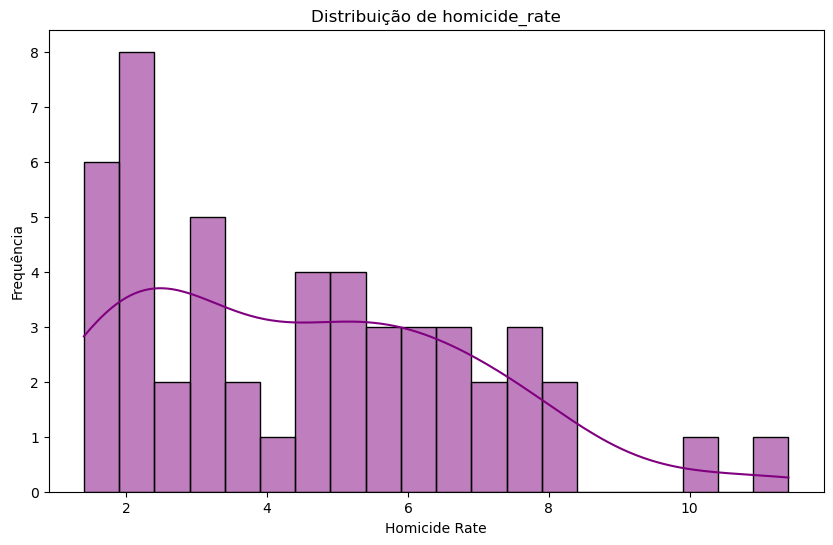

In [46]:
plt.figure(figsize=(10,6)) #Tamanho do Gráfico
sns.histplot(df['homicide_rate'], bins=20, kde =True, color='purple') #define os padrões visuais do gráfico
plt.title('Distribuição de homicide_rate')
plt.xlabel('Homicide Rate')
plt.ylabel('Frequência')
plt.show()

### Dataviz

Inicialmente vamos fazer um boxplot para entender melhor como a taxa de homicídios se comporta em diferente categorias de indice de GINI

Para isso, vamos dividir os estados entre 3 categorias: Indice de GINI baixo, médio e alto

In [ ]:
gini_min = df['gini_index'].min() #indice minimo
gini_max = df['gini_index'].max() #indice máximo

bins = [gini_min-0.01, gini_min + (gini_max-gini_min)/3, gini_min + 2*(gini_max-gini_min)/3, gini_max+0.01] #separando em três categorias simétricas
labels = ['Baixo', 'Médio', 'Alto'] #Rotulos

df['gini_category'] = pd.cut(df['gini_index'], bins=bins, labels=labels, include_lowest=True) #Colocando essas informações na base

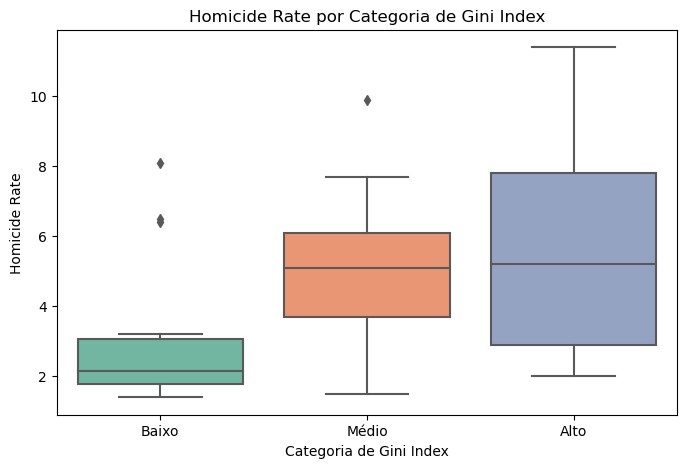

In [65]:
plt.figure(figsize=(8,5))
sns.boxplot(x='gini_category', y='homicide_rate', data=df, palette='Set2')
plt.title('Homicide Rate por Categoria de Gini Index')
plt.xlabel('Categoria de Gini Index')
plt.ylabel('Homicide Rate')
plt.show()

Podemos ver que, como esperado, o aumento no índice de GINI tem um impacto positivo no número de homicídios

Agora, vamos utilizar um sactterplot para observar a tendência entre taxa de homicídio e renda per capita

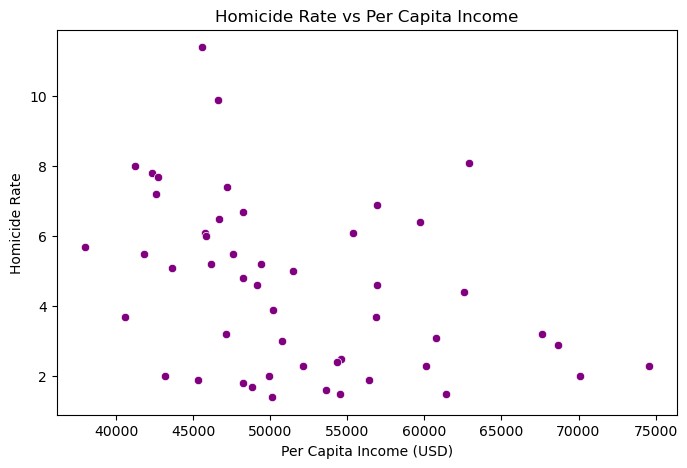

In [55]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['per_capita_income'], y=df['homicide_rate'], color='purple')
plt.title('Homicide Rate vs Per Capita Income')
plt.xlabel('Per Capita Income (USD)')
plt.ylabel('Homicide Rate')
plt.show()

Aqui temos novamente o esperado, um impacto negativo da renda no número de homicídios

### Observando a correlação

C:\Users\User\AppData\Local\Temp\ipykernel_19840\4194365930.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


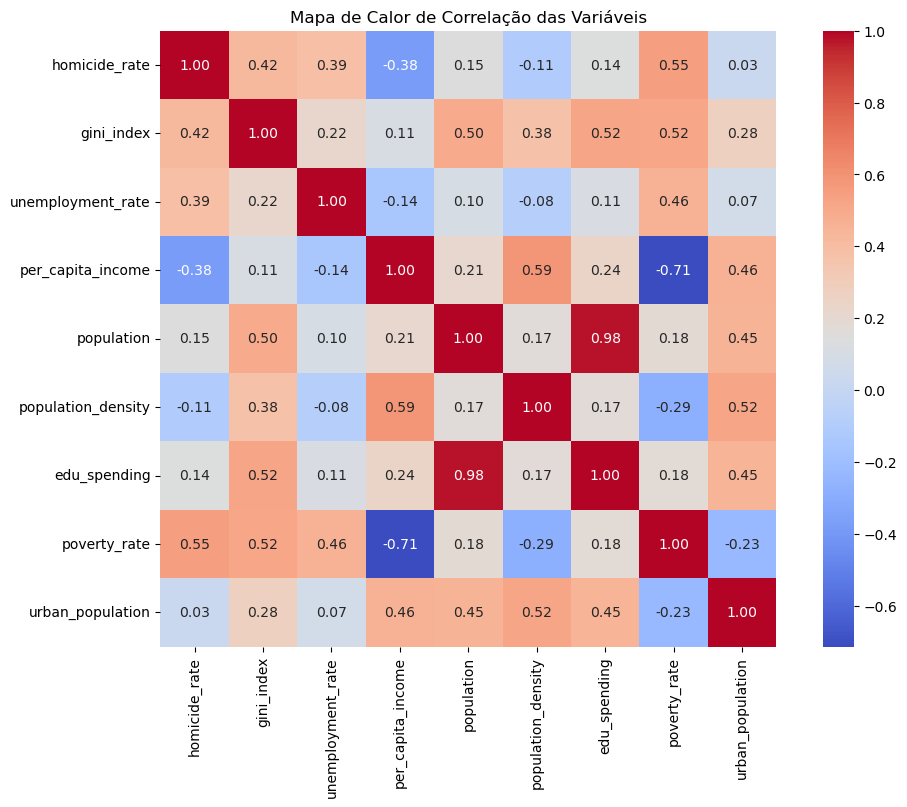

In [51]:
correlation_matrix = df.corr()

plt.figure(figsize=(12,8))

sns.heatmap(correlation_matrix, 
            annot=True,       # mostrar os valores
            fmt=".2f",        # formatar com duas casas decimais
            cmap="coolwarm",  # paleta de cores
            cbar=True,        # mostrar barra de cores
            square=True)      # quadrado para cada célula

plt.title("Mapa de Calor de Correlação das Variáveis")
plt.show()

Aqui podemos ver diversos pontos já esperados, mas um deles me chama atenção: A alta correlação entre população e gasto com educação. Isso se da pois o gasto etá em número absoluto, vamos regular ele para dolar por 100k habitantes

In [ ]:
df['edu_spending_per_100k'] = (df['edu_spending'] / df['population']) * 100000

C:\Users\User\AppData\Local\Temp\ipykernel_19840\3205476752.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


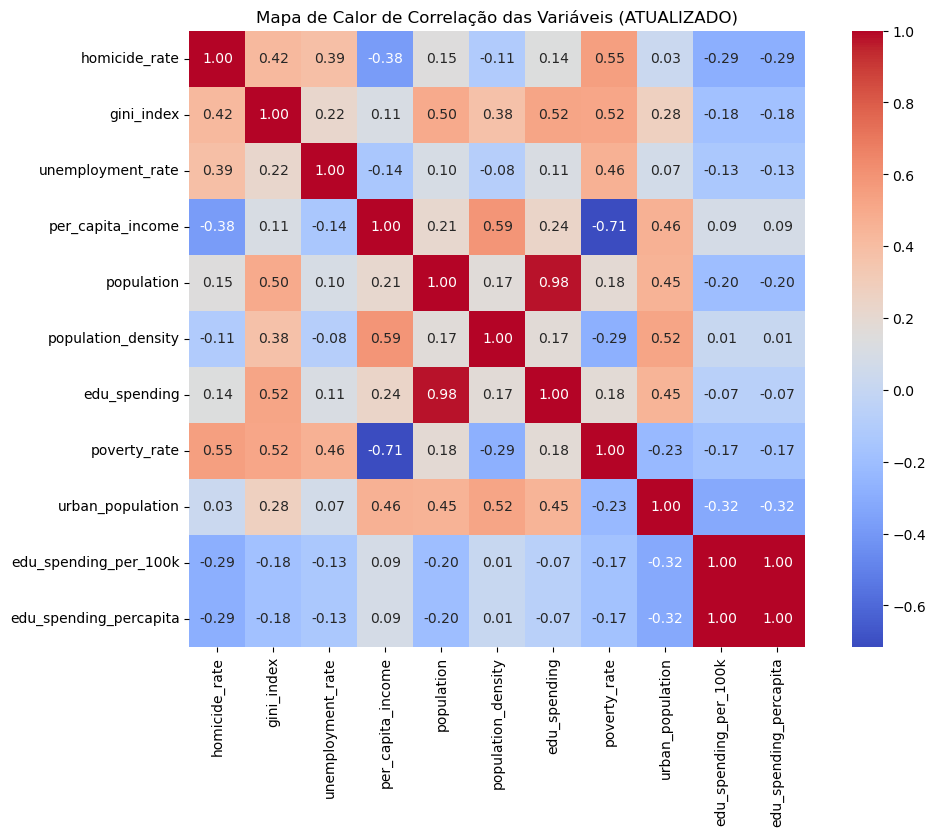

In [77]:
correlation_matrix = df.corr()

plt.figure(figsize=(12,8))

sns.heatmap(correlation_matrix, 
            annot=True,       # mostrar os valores
            fmt=".2f",        # formatar com duas casas decimais
            cmap="coolwarm",  # paleta de cores
            cbar=True,        # mostrar barra de cores
            square=True)      # quadrado para cada célula

plt.title("Mapa de Calor de Correlação das Variáveis (ATUALIZADO)")
plt.show()


## Criando um modelo de regressão linear

Para esse tipo de análise, vamo usar o pacote statsmodels

In [ ]:
pip install statsmodels

In [79]:
import statsmodels.api as sm

Uma regressão linear não precisa utilizar todas as variaveis disponíveis, isso pode gerar ruído e poluir a análise, vamos selecionar as variáveis que mais se correlacionam, para assim 

O objetivo do modelo é entender como diferentes fatores socioeconômicos e demográficos afetam a taxa de homicídios nos estados

$$
\text{Homicide Rate}_i = \beta_0 + \beta_1 \cdot \text{Poverty Rate}_i + \beta_2 \cdot \text{Gini Index}_i + \beta_3 \cdot \text{Unemployment Rate}_i + \beta_4 \cdot \text{Per Capita Income}_i + \beta_5 \cdot \text{Edu Spending per 100 k}_i + \varepsilon_i
$$

Onde:  

- $\text{Poverty Rate}_i$: taxa de pobreza na região $i$ (0.548) → relação positiva e relativamente forte: quanto maior a pobreza, maior a taxa de homicídios  
- $\text{Gini Index}_i$: índice de Gini da região $i$ (0.418) → relação positiva: mais desigualdade, mais homicídios  
- $\text{Unemployment Rate}_i$: taxa de desemprego da região $i$ (0.389) → relação positiva moderada: mais desemprego, mais homicídios  
- $\text{Per Capita Income}_i$: renda per capita da região $i$ (-0.380) → relação negativa: maior renda reduz homicídios  
- $\text{Edu Spending per 100k}_i$: gasto com educação por 100mil habitantes (-0.29) → relação negativa: maior gasto reduz homicídios  
- $\varepsilon_i$: termo de erro


In [80]:
y = df['homicide_rate']

# Variáveis independentes (as 5 mais relevantes)
X = df[['poverty_rate', 
        'gini_index', 
        'unemployment_rate', 
        'per_capita_income', 
        'edu_spending_per_100k']]

# Adicionar constante para o intercepto
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibir resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          homicide_rate   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     7.576
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           3.33e-05
Time:                        18:52:54   Log-Likelihood:                -99.165
No. Observations:                  50   AIC:                             210.3
Df Residuals:                      44   BIC:                             221.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.60

### Interpretando o modelo

#### Resultados Principais


| Variável                  | Coeficiente (β) | P-valor | Interpretação |
|----------------------------|----------------|---------|---------------|
| Intercepto (β0)            | -21.61         | 0.019   | Taxa de homicídios esperada quando todas as variáveis explicativas são zero. |
| Poverty Rate               | -46.48         | 0.143   | Relação negativa, mas não estatisticamente significativa (p > 0.05). |
| Gini Index                 | 90.16          | 0.006   | Relação positiva significativa: maior desigualdade → mais homicídios. |
| Unemployment Rate          | 1.10           | 0.016   | Relação positiva significativa: maior desemprego → mais homicídios. |
| Per Capita Income          | -0.0002        | 0.012   | Relação negativa significativa: maior renda per capita → menos homicídios. |
| Edu Spending per 100k      | -2.75e-08      | 0.212   | Relação negativa, não significativa. |

#### Métricas do Modelo

- \(R^2 = 0.463\) → aproximadamente 46% da variação da taxa de homicídios é explicada pelo modelo.  
- F-statistic: 7.576, p < 0.001 → o modelo como um todo é significativo.  
- Alguns sinais de multicolinearidade, indicado pelo alto condition number (8.88e+09)